In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## **1. Exploratory Data Analysis (EDA)**

First, Load the dataset and check its structure. then read the data from the CSV file, display the first few rows, and get an overview of the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Memanggil data
df = pd.read_csv('/content/drive/MyDrive/salary-dataset/Salary Prediction of Data Professions.csv')

In [ ]:
# Menampilkan 5 data teratas
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


**Data Visualization**

Let's visualize some key aspects of the data to uncover patterns and insights.

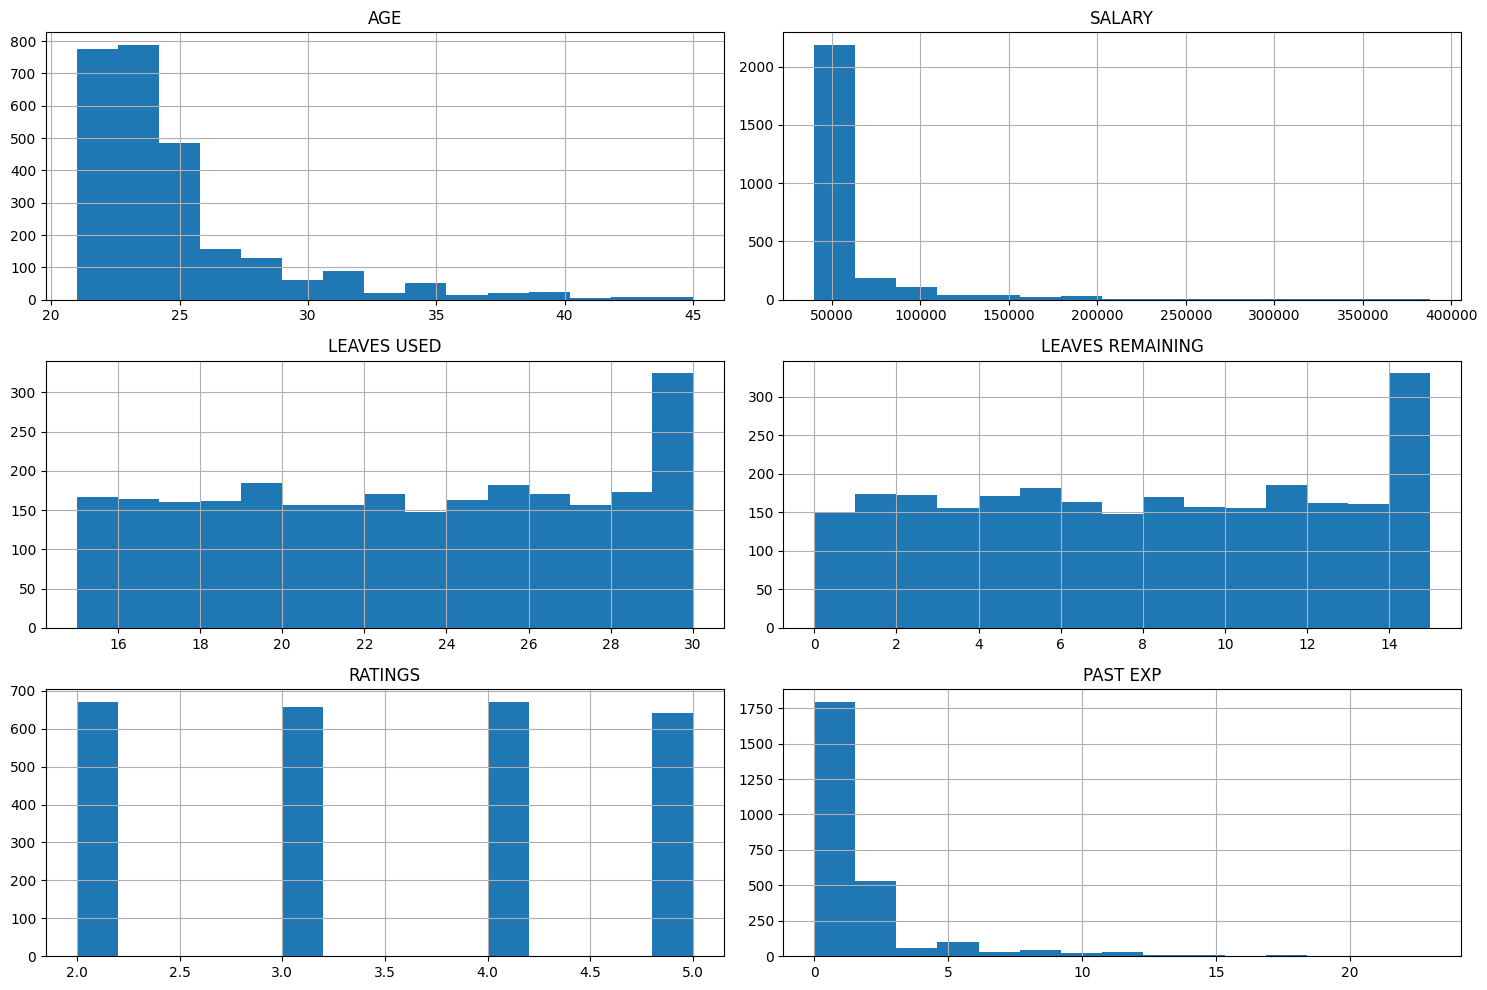

In [ ]:
# Plotting distributions of numerical features
numerical_features = ['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.tight_layout()
plt.show()

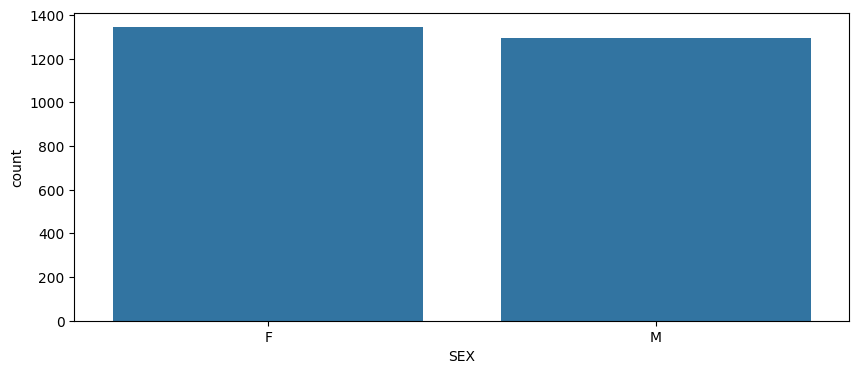

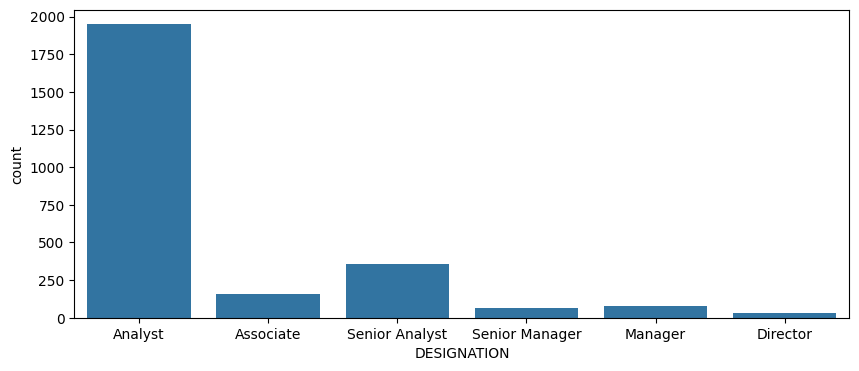

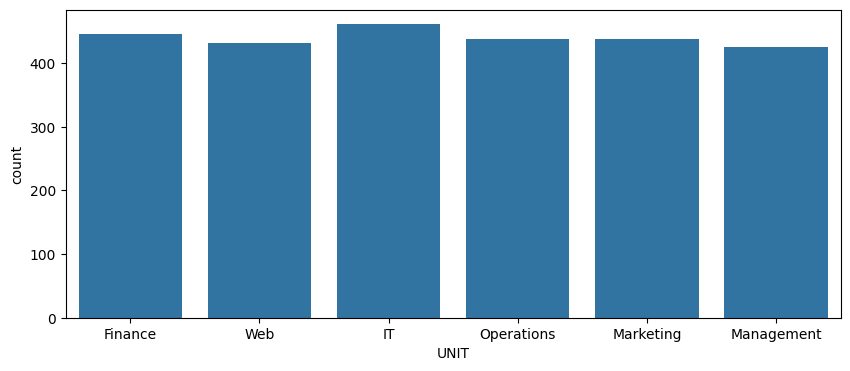

In [ ]:
# Plotting categorical features
categorical_features = ['SEX', 'DESIGNATION', 'UNIT']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=feature)
    plt.show()


## **2. Feature Engineering**



**Creating New Features**

We can create new features based on the existing ones. For example, we can extract the tenure of employees from their Date of Joining (DOJ) and the current date.

In [ ]:
# Date features
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

In [ ]:
# Calculate tenure in years
df['TENURE'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365

In [ ]:
# Display the first few rows to verify the new feature
print(df[['DOJ', 'CURRENT DATE', 'TENURE']].head())

         DOJ CURRENT DATE    TENURE
0 2014-05-18   2016-01-07  1.641096
1        NaT   2016-01-07       NaN
2 2014-07-28   2016-01-07  1.446575
3 2013-04-03   2016-01-07  2.764384
4 2014-11-20   2016-01-07  1.131507


In [ ]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TENURE
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.641096
1,ANNIE,NaN,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.446575
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.764384
4,LEON,ABOULAHOUD,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.131507


**Transforming Existing Features**

We might want to transform existing features to improve model performance. For instance, we can normalize the salary and other numerical features

In [ ]:
# Columns to scale
cols_to_scale = ['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'TENURE']

In [ ]:
# Initialize scaler
scaler = StandardScaler()

In [ ]:
# Scale the columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TENURE
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,-0.961347,-0.367960,Finance,0.325503,-0.326623,-1.333211,-0.574391,-0.614907
1,ANNIE,NaN,F,NaT,2016-01-07,Associate,NaN,0.842700,Web,NaN,1.194349,NaN,1.991686,NaN
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,-0.961347,-0.466007,Finance,0.108281,-0.109341,-0.436126,-0.574391,-0.831374
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,-0.705428,-0.341380,IT,-0.108940,0.107940,-0.436126,-0.574391,0.635114
4,LEON,ABOULAHOUD,M,2014-11-20,2016-01-07,Analyst,NaN,-0.406176,Operations,0.977167,-0.978468,NaN,0.525356,-1.181989


## **3. Data Preprocessing**

**Handling Missing Values**

In [ ]:
# Pengecekan Fitur yang terdapat Missing Vlue
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
TENURE              1
dtype: int64

In [ ]:
# Filling missing values with appropriate strategies
df['LAST NAME'].fillna('Unknown', inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LEAVES USED'].fillna(df['LEAVES USED'].median(), inplace=True)
df['LEAVES REMAINING'].fillna(df['LEAVES REMAINING'].median(), inplace=True)
df['RATINGS'].fillna(df['RATINGS'].median(), inplace=True)
df['TENURE'].fillna(df['TENURE'].median(), inplace=True)

In [ ]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
TENURE              0
dtype: int64

**Encoding Categorical Variables**

We need to encode categorical variables for model training. We can use one-hot encoding for this purpose.

In [ ]:
# Encoding Categorical Variables
label_encoder = LabelEncoder()

df['FIRST NAME'] = label_encoder.fit_transform(df['FIRST NAME'])
df['LAST NAME'] = label_encoder.fit_transform(df['LAST NAME'])
df['SEX'] = label_encoder.fit_transform(df['SEX'])
df['DESIGNATION'] = label_encoder.fit_transform(df['DESIGNATION'])
df['UNIT'] = label_encoder.fit_transform(df['UNIT'])

In [ ]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TENURE
0,2208,2436,0,2014-05-18,2016-01-07,0,-0.961347,-0.367960,0,0.325503,-0.326623,-1.333211,-0.574391,-0.614907
1,127,2475,0,NaT,2016-01-07,1,-0.193590,0.842700,5,-0.108940,1.194349,-0.436126,1.991686,-0.111850
2,1770,1671,0,2014-07-28,2016-01-07,0,-0.961347,-0.466007,0,0.108281,-0.109341,-0.436126,-0.574391,-0.831374
3,392,2137,0,2013-04-03,2016-01-07,0,-0.705428,-0.341380,1,-0.108940,0.107940,-0.436126,-0.574391,0.635114
4,1377,161,1,2014-11-20,2016-01-07,0,-0.193590,-0.406176,4,0.977167,-0.978468,-0.436126,0.525356,-1.181989


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIRST NAME        2639 non-null   int64         
 1   LAST NAME         2639 non-null   int64         
 2   SEX               2639 non-null   int64         
 3   DOJ               2638 non-null   datetime64[ns]
 4   CURRENT DATE      2639 non-null   datetime64[ns]
 5   DESIGNATION       2639 non-null   int64         
 6   AGE               2639 non-null   float64       
 7   SALARY            2639 non-null   float64       
 8   UNIT              2639 non-null   int64         
 9   LEAVES USED       2639 non-null   float64       
 10  LEAVES REMAINING  2639 non-null   float64       
 11  RATINGS           2639 non-null   float64       
 12  PAST EXP          2639 non-null   float64       
 13  TENURE            2639 non-null   float64       
dtypes: datetime64[ns](2), fl

**Splitting the Data**

Finally, we need to split the data into training and testing sets

In [ ]:
# Define features and target variable
X = df.drop(['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE', 'SALARY'], axis=1)
y = df['SALARY']

In [ ]:
# Verify there are no missing values in the features
print(X.isnull().sum())

SEX                 0
DESIGNATION         0
AGE                 0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
TENURE              0
dtype: int64


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Verify the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2111, 9) (528, 9) (2111,) (528,)


In [ ]:
# Check for missing values after split
print(X_train.isnull().sum())
print(X_test.isnull().sum())

SEX                 0
DESIGNATION         0
AGE                 0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
TENURE              0
dtype: int64
SEX                 0
DESIGNATION         0
AGE                 0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
TENURE              0
dtype: int64


In [ ]:
# Handle any remaining missing values if present
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

## **4. Machine Learning Model Development**

I will train various machine learning regression models to predict salary and experiment with different algorithms to find the best performing model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)}

**Train Models**

In [ ]:
# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} model trained.')

Linear Regression model trained.
Decision Tree model trained.
Random Forest model trained.
Gradient Boosting model trained.


## **5. Model Evaluation**

In [ ]:
# Model Evaluation
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')

Linear Regression - MAE: 0.30876152908617177, MSE: 0.28401857413511244, RMSE: 0.5329339303657747, R2: 0.7674888662102266
Decision Tree - MAE: 0.13264136203603025, MSE: 0.06225446928277019, RMSE: 0.2495084553332215, R2: 0.9490355260021425
Random Forest - MAE: 0.11757476687084017, MSE: 0.06680578280350004, RMSE: 0.25846814659354067, R2: 0.9453096039558111
Gradient Boosting - MAE: 0.12512778207831, MSE: 0.08461131311050726, RMSE: 0.2908802384324299, R2: 0.9307331486939768


# **ML Pipelines and Model Deployment**



In this step, I will create an end-to-end machine learning pipeline and apply the model to generate predictions for unseen data. I will use the scikit-learn pipeline to simplify the process and FastAPI for deployment.

**Create ML Pipeline**

First, i will define a pipeline that includes data preprocessing and model training.


In [ ]:
# Required libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Define the preprocessing for numerical features
numerical_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'TENURE']
numerical_transformer = StandardScaler()


In [ ]:
# Define the preprocessing for categorical features
categorical_features = ['SEX', 'DESIGNATION', 'UNIT']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
# Define the model
model = RandomForestRegressor(random_state=42)

In [ ]:
# Create and combine preprocessing and modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


In [ ]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE', 'LEAVES USED',
                                                   'LEAVES REMAINING',
                                                   'RATINGS', 'PAST EXP',
                                                   'TENURE']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SEX', 'DESIGNATION',
                                                   'UNIT'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
# Evaluate the pipeline
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Random Forest - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')

Random Forest - MAE: 0.12259419064114138, MSE: 0.08370580879750524, RMSE: 0.28931956172631196, R2: 0.9314744376575904


**Step 2: Save the Trained Model**

Next, we save the trained pipeline model to a file using joblib.

In [ ]:
import joblib

# Save the model to a file
joblib.dump(pipeline, 'salary_prediction_model.pkl')

['salary_prediction_model.pkl']

**Step 3: Create a FastAPI Application**

We will create a FastAPI application to serve the model and handle prediction requests.

**1. Install FastAPI and uvicorn:**

In [ ]:
pip install fastapi uvicorn joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**2. Create a main.py file for the FastAPI application**

In [ ]:
pip install nest_asyncio
